<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:80px;background-color:#967259;overflow:hidden;font-weight:800">
Let's go to the coffee shop!</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/sales-dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## <b><div style='padding:15px;background-color:#967259;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About the Coffe Shop</div></b>

<h3 style="color:#e96e3f;"> Our group of friends decided to get together at a coffee shop. Then, we will help them choose the store and the product that will be consumed. </h3>

## <b><div style='padding:15px;background-color:#967259;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  First let's call our friends to go to the coffee shop with us!</div></b>

In [2]:
# Our friends

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#967259;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Now let's check the information about the coffee shop.</div></b>

In [3]:
df = pd.read_excel('/kaggle/input/coffee-shop-sales-dataset/Coffee Shop Sales.xlsx', sheet_name='Transactions')

In [4]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,Jan,7,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,1,Jan,7,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7


## <b><div style='padding:15px;background-color:#967259;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |   Let's see the details of the coffee shop.</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (149116, 17)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
transaction_id,int64,0,0.0,0,149116,149116,1.0,149456.0,74737.371872,43153.600016,1,2,3
transaction_date,datetime64[ns],0,0.0,0,181,149116,2023-01-01 00:00:00,2023-06-30 00:00:00,2023-04-15 11:50:32.173609984,NaN,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00
transaction_time,object,0,0.0,0,25762,149116,NaN,NaN,NaN,NaN,07:06:11,07:08:56,07:14:04
transaction_qty,int64,0,0.0,0,6,149116,1.0,8.0,1.438276,0.542509,2,2,2
store_id,int64,0,0.0,0,3,149116,3.0,8.0,5.342063,2.074241,5,5,5
store_location,object,0,0.0,0,3,149116,NaN,NaN,NaN,NaN,Lower Manhattan,Lower Manhattan,Lower Manhattan
product_id,int64,0,0.0,0,80,149116,1.0,87.0,47.918607,17.93002,32,57,59
unit_price,float64,0,0.0,0,41,149116,0.8,45.0,3.382219,2.658723,3.0,3.1,4.5
product_category,object,0,0.0,0,9,149116,NaN,NaN,NaN,NaN,Coffee,Tea,Drinking Chocolate
product_type,object,0,0.0,0,29,149116,NaN,NaN,NaN,NaN,Gourmet brewed coffee,Brewed Chai tea,Hot chocolate


<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>This data is clean from NaN values and duplicates.</div>

In [6]:
# Numerical Data
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price,Revenue,Month,Weekday,Hour
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,4.686367,3.988881,3.982336,11.735790
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,1.000000,1.000000,6.000000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,3.000000,3.000000,2.000000,9.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,3.750000,4.000000,4.000000,11.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,6.000000,5.000000,6.000000,15.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,360.000000,6.000000,7.000000,20.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,4.227099,1.673091,1.996650,3.764662


In [7]:
# Categorical Data
df.describe(include= object)

,transaction_time,store_location,product_category,product_type,product_detail,Month.1,Weekday.1
count,149116,149116,149116,149116,149116,149116,149116
unique,25762,3,9,29,80,6,7
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant,Jun,Fri
freq,41,50735,58416,17183,3076,35352,21701


## <b><div style='padding:15px;background-color:#967259;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  Now let's explore the information we have to choose which store we will go to and what we will order.</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#C70039'> Month</span></b>  

<h3 style="color:#e96e3f;"> Well, is the coffee shop being successful? Let's analyze the evolution of sales in the first 6 months.</h3>

In [8]:
print(df['transaction_date'].min())
print(df['transaction_date'].max())

2023-01-01 00:00:00
2023-06-30 00:00:00


In [9]:
df_month = df['Month'].value_counts()
df_month

Month
6    35352
5    33527
4    25335
3    21229
1    17314
2    16359
Name: count, dtype: int64

In [10]:
iplot(px.bar(x=df_month.index, y=df_month.values,
             labels={'x': 'Month', 'y': 'Number of Transactions'},
             title='Transactions per Month', text_auto= True))

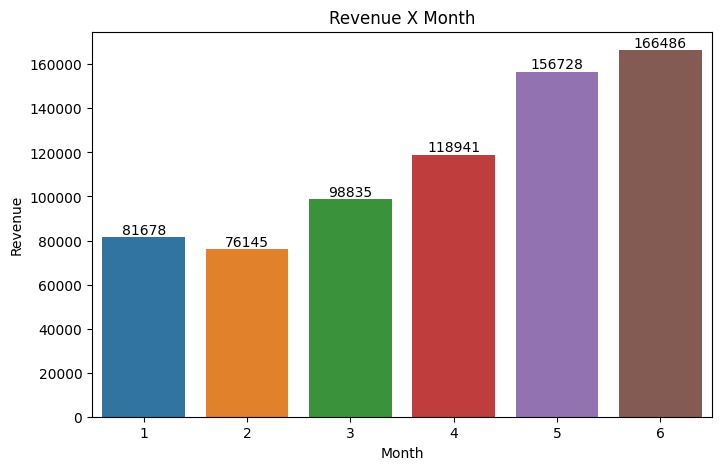

In [11]:
# Revenue X Month
revenue = df.groupby("Month")["Revenue"].sum().reset_index()

# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = "Month", y = "Revenue", data = revenue)
plt.title("Revenue X Month", fontsize = 12)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Very good, revenue is increasing in the first 6 months. So let's choose this coffee shop.</div>

### <b><span style='color:#DEB078'>5.7 |</span><span style='color:#C70039'> store_location</span></b> 

<h3 style="color:#e96e3f;"> There are 3 stores nearby, let's choose one of them.</h3>

In [12]:
df_loc = df['store_location'].value_counts()
df_loc

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

In [13]:
iplot(px.pie(names=df_loc.index, values=df_loc.values,
             title='Percentagem of Sales for store_location'))

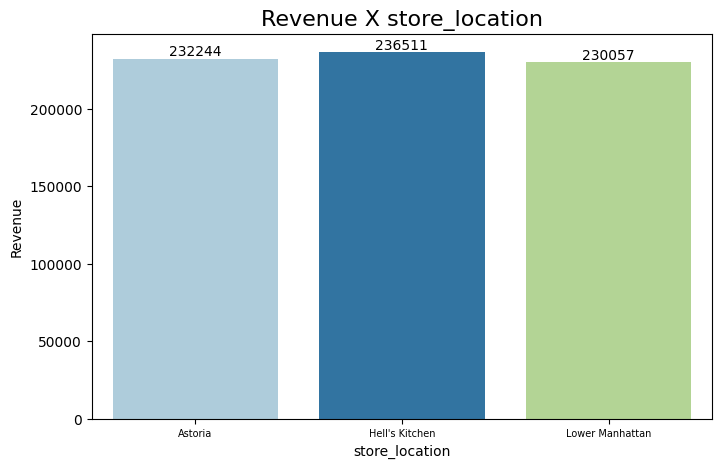

In [14]:
# Revenue X store_location
revenue = df.groupby("store_location")["Revenue"].sum().reset_index()
# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = "store_location", y = "Revenue", data = revenue, palette = 'Paired')
plt.title("Revenue X store_location", fontsize = 16)
plt.xticks(rotation=0, fontsize = 7)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>The 3 stores have very similar movement, so we will choose the closest one. In this case, we chose 'Astoria'.</div>

### <b><span style='color:#DEB078'>5.5 |</span><span style='color:#C70039'> Weekday</span></b>  

<h3 style="color:#e96e3f;"> Now let's analyze the movement on weekdays to choose which day we go.</h3>

In [15]:
# Let's analyze the weekday movement in the "Astoria" store.
df_ast = df.loc[df['store_location'].isin(['Astoria'])]
transactions_per_weekday = df_ast['Weekday.1'].value_counts()
transactions_per_weekday

Weekday.1
Thu    7427
Mon    7403
Wed    7370
Fri    7352
Sun    7073
Tue    7032
Sat    6942
Name: count, dtype: int64

In [16]:
iplot(px.bar(x=transactions_per_weekday.index, y=transactions_per_weekday.values,
             labels={'x': 'Weekday.1', 'y': 'Number of Transactions'},
             title='Transactions per Weekday at Astoria', text_auto= True))

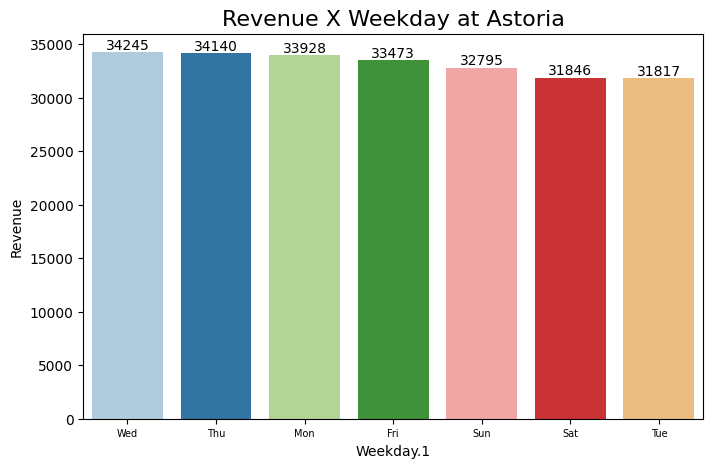

In [17]:
# Revenue X Weekday at Astoria
revenue = df_ast.groupby("Weekday.1")["Revenue"].sum().reset_index()
revenue.sort_values(["Revenue", "Weekday.1"], axis=0, ascending=False, inplace=True)
# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = "Weekday.1", y = "Revenue", data = revenue, palette = 'Paired')
plt.title("Revenue X Weekday at Astoria", fontsize = 16)
plt.xticks(rotation=0, fontsize = 7)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>We can see that the movement is very similar every day of the week. Soon we will choose to go to the coffee shop on Saturday.</div>

### <b><span style='color:#DEB078'>5.5 |</span><span style='color:#C70039'> Hour</span></b>  

<h3 style="color:#e96e3f;"> We will also analyze the busiest and least busy times on Saturdays at 'Astoria'.</h3>

In [18]:
df_ast_sat = df_ast.loc[df['Weekday.1'].isin(['Sat'])]
transactions_per_hour = df_ast_sat['Hour'].value_counts()
transactions_per_hour

Hour
10    708
8     652
9     644
7     575
12    518
19    510
15    503
11    502
16    500
14    464
18    464
17    461
13    441
Name: count, dtype: int64

In [19]:
iplot(px.bar(x=transactions_per_hour.index, y=transactions_per_hour.values,
             labels={'x': 'Hour', 'y': 'Number of Transactions'},
             title='Transactions per Hour on Saturdays at Astoria', text_auto= True))

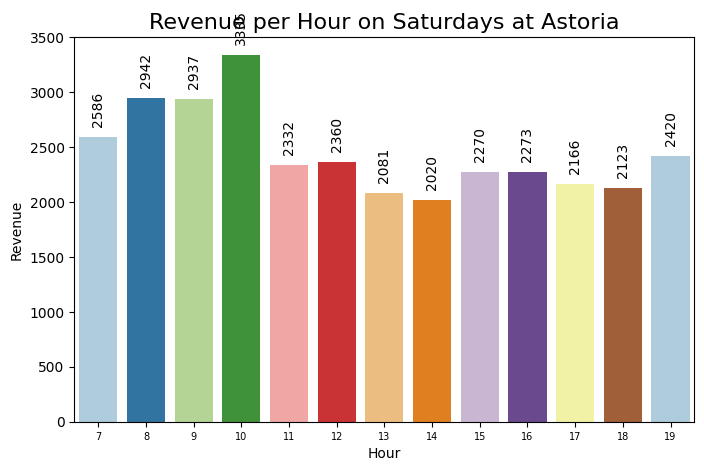

In [20]:
# Revenue per Hour on Saturdays at Astoria
revenue = df_ast_sat.groupby("Hour")["Revenue"].sum().reset_index()
revenue.sort_values(["Revenue", "Hour"], axis=0, ascending=False, inplace=True)
# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = "Hour", y = "Revenue", data = revenue, palette = 'Paired')
plt.title("Revenue per Hour on Saturdays at Astoria", fontsize = 16)
plt.xticks(rotation=0, fontsize = 7)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                rotation=90, xytext = (0, 20), textcoords = 'offset points')
    
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>As we want to go on Saturday morning and don't want a lot of traffic, we will choose the 11 am time.</div>

### <b><span style='color:#DEB078'>5.8 |</span><span style='color:#C70039'> product_type</span></b> 

<h3 style="color:#e96e3f;"> The time has come to choose the type of product we want.</h3>

In [21]:
# Let's analyze the types of products most sold in the Astoria store, on Saturdays at 11 am.

df_ast_sat_11 = df_ast_sat.loc[df['Hour'].isin([11])]
df_type = df_ast_sat_11['product_type'].value_counts()
df_type

product_type
Gourmet brewed coffee    70
Barista Espresso         59
Brewed Chai tea          56
Hot chocolate            45
Brewed herbal tea        41
Brewed Black tea         38
Scone                    33
Premium brewed coffee    33
Organic brewed coffee    31
Drip coffee              28
Pastry                   22
Biscotti                 18
Brewed Green tea         16
Regular syrup             5
Sugar free syrup          2
Drinking Chocolate        1
Housewares                1
Clothing                  1
Herbal tea                1
Organic Beans             1
Name: count, dtype: int64

In [22]:
iplot(px.bar(x=df_type.index, y=df_type.values,
             labels={'x': 'df_type', 'y': 'Number of sales'},
             title='Transactions per Hour on Saturdays at 11 am in Astoria', text_auto= True))

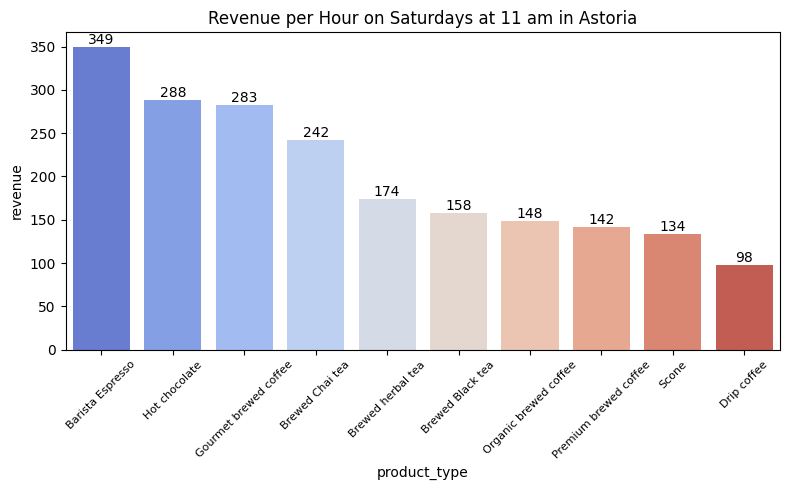

In [23]:
# Revenue per Hour on Saturdays at 11 am in Astoria
category_revenue = df_ast_sat_11.groupby("product_type")["Revenue"].sum().reset_index(name = "revenue")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False).head(10)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
ax=sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "coolwarm")
plt.title("Revenue per Hour on Saturdays at 11 am in Astoria", fontsize = 12)

# set x-axis rotation
plt.xticks(size = 8, rotation = 45)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Okay, analyzing the most popular types of products, our group chose the 'Barista Espresso' type.</div>

### <b><span style='color:#DEB078'>5.15 |</span><span style='color:#C70039'> product_id</span></b>

<h3 style="color:#e96e3f;"> Finally we will choose the product we are going to order.</h3>

In [24]:
df_ast_sat_11_prod = df_ast_sat_11.loc[df_ast_sat_11['product_type'].isin(['Barista Espresso'])]

df_product = df_ast_sat_11_prod['product_id'].value_counts()
df_product

product_id
41    14
38    13
39    12
37    10
40    10
Name: count, dtype: int64

In [25]:
iplot(px.bar(x=df_product.index, y=df_product.values,
             labels={'x': 'df_type', 'y': 'Number of sales'},
             title='Transactions of "Barista Espresso" per Hour on Saturdays at 11 am in Astoria', text_auto= True))

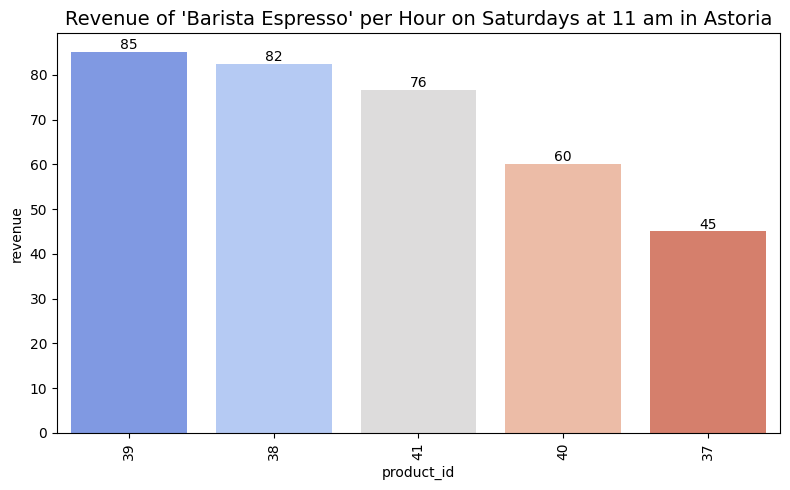

In [26]:
# Revenue of 'Barista Espresso' per Hour on Saturdays at 11 am in Astoria

category_revenue = df_ast_sat_11_prod.groupby("product_id")["Revenue"].sum().reset_index(name = "revenue")
category_revenue.product_id = category_revenue.product_id.astype('str')

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False).head(10)

plt.figure(figsize = (8,5))

# create bar plot
ax=sns.barplot(x = "product_id", y = "revenue", data = category_revenue, palette = "coolwarm")
plt.title("Revenue of 'Barista Espresso' per Hour on Saturdays at 11 am in Astoria", fontsize = 14)

# set x-axis rotation
plt.xticks(rotation = 90)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Finally, everything is decided. Our group goes to the Coffe Shop in 'Astoria', on a Saturday, at 11 am and will order product_id = 39 of the type 'Barista Espresso".</div>

In [27]:
# Let's analyze a purchase of 
    # store_location = Astoria
    # Weekday.1 = Sat
    # Hour = 11
    # product_type = Barista Espresso
    # product_id = 39

df_ast_sat_11_prod.iloc[40]

transaction_id                   109592
transaction_date    2023-05-27 00:00:00
transaction_time               11:56:08
transaction_qty                       1
store_id                              3
store_location                  Astoria
product_id                           39
unit_price                         4.25
product_category                 Coffee
product_type           Barista Espresso
product_detail                 Latte Rg
Revenue                            4.25
Month                                 5
Month.1                             May
Weekday                               6
Weekday.1                           Sat
Hour                                 11
Name: 109338, dtype: object

## <b><div style='padding:15px;background-color:#967259;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, come with us to the Coffee Shop too!</div></b>